In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn import svm
import seaborn as sns
import sys

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
dataset = dataset.drop(["Name","Ticket","Cabin","PassengerId"],axis = 1)

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
dataset["Sex"] = le.fit_transform(dataset["Sex"])

In [8]:
import numpy as np
new_age_var = np.where(dataset["Age"].isnull(),29,dataset["Age"])

In [9]:
dataset["Age"] = new_age_var

In [10]:
freq_port = dataset.Embarked.dropna().mode()[0]
freq_port

'S'

In [11]:
combine = [dataset]

In [12]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [13]:
dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [14]:
dataset.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,0


# KNN

In [15]:
def knn_test(dataset,st):
    y = dataset[st]
    X = dataset.drop([st],axis = 1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
    knnmax = -sys.maxsize -1 
    for i in range(1,len(X_train)):
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        re = knn.fit(X_train,y_train).score(X_test,y_test)
        if(re > knnmax):
            knnmax = re
    return knnmax,knn,X_test,y_test

__Survived as DV and rest as IDV__

In [16]:
re = list(knn_test(dataset,"Survived"))
print("Accuracy Score:",re[0])

Accuracy Score: 0.7574626865671642


In [17]:
knn = re[1]
X_test = re[2]
y_pred = knn.predict(X_test)

In [18]:
y_test = re[3]
cf = confusion_matrix(y_test,y_pred)
cf

array([[168,   0],
       [100,   0]], dtype=int64)

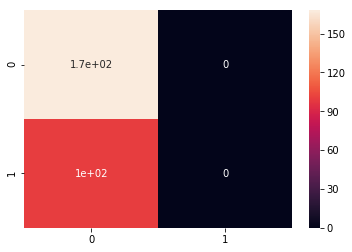

In [19]:
sns.heatmap(cf, annot = True)

__Pclass as Dv and the rest as IDV__

In [20]:
res = list(knn_test(dataset,"Pclass"))
print("Accuracy Score:",res[0])

Accuracy Score: 0.8544776119402985


In [21]:
knn = res[1]
X_test = res[2]
y_test = res[3]
y_pred = knn.predict(X_test)

In [22]:
cf = confusion_matrix(y_test,y_pred)

In [23]:
cf

array([[  0,   0,  60],
       [  0,   0,  52],
       [  0,   0, 156]], dtype=int64)

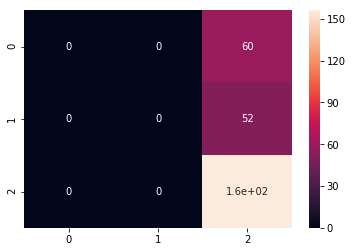

In [24]:
sns.heatmap(cf, annot = True)

__SibSp as Dv and the rest IDV__

In [25]:
re = list(knn_test(dataset,"SibSp"))
print(re[0])

0.75


In [26]:
knn = re[1]
X_test = re[2]
y_test = re[3]
y_pred = knn.predict(X_test)

In [27]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[181,   0,   0,   0,   0,   0],
       [ 65,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0]], dtype=int64)

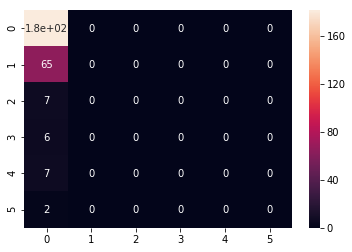

In [28]:
sns.heatmap(cf, annot = True)

__Parch as DV and the rest as IDV__

In [29]:
re = list(knn_test(dataset,"Parch"))
print(re[0])

0.8246268656716418


In [30]:
knn = re[1]
X_test = re[2]
y_test = re[3]
y_pred = knn.predict(X_test)

In [31]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[204,   0,   0,   0,   0],
       [ 40,   0,   0,   0,   0],
       [ 21,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0]], dtype=int64)

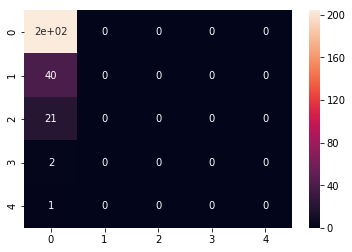

In [32]:
sns.heatmap(cf, annot = True)

__Embarked as DV and the rest as IDV__

In [33]:
re = list(knn_test(dataset,"Embarked"))
print(re[0])

0.7761194029850746


In [34]:
knn = re[1]
X_test = re[2]
y_test = re[3]
y_pred = knn.predict(X_test)

In [35]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[187,   0,   0],
       [ 60,   0,   0],
       [ 21,   0,   0]], dtype=int64)

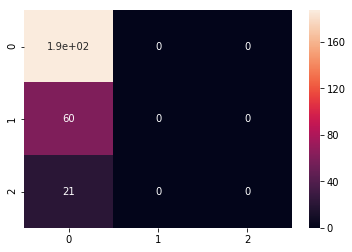

In [36]:
sns.heatmap(cf, annot = True)

__Sex as Dv and the rest as IDV__

In [ ]:
re = list(knn_test(dataset,"Sex"))
print(re[0])

In [ ]:
knn = re[1]
X_test = re[2]
y_test = re[3]
y_pred = knn.predict(X_test)

In [ ]:
cf = confusion_matrix(y_test,y_pred)
cf

In [ ]:
sns.heatmap(cf, annot = True)

# SVM

In [ ]:
def svm_test(dataset,st):
    y = dataset[st]
    X = dataset.drop([st],axis = 1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
    clf = svm.SVC(gamma = 0.01,C = 100)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return y_pred,y_test

__Pclass as DV and the rest as IDV__

In [ ]:
re = list(svm_test(dataset,"Pclass"))
y_pred = re[0]
y_test = re[1]

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cf = confusion_matrix(y_test,y_pred)
cf

In [ ]:
sns.heatmap(cf, annot = True)

__Embarked as DV and the rest as IDV__

In [ ]:
re = list(svm_test(dataset,"Embarked"))
y_pred = re[0]
y_test = re[1]

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cf = confusion_matrix(y_test,y_pred)
cf

In [ ]:
sns.heatmap(cf, annot = True)

__Sex as DV and the rest as IDV__

In [ ]:
re = list(svm_test(dataset,"Sex"))
y_pred = re[0]
y_test = re[1]

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cf = confusion_matrix(y_test,y_pred)
cf

In [ ]:
sns.heatmap(cf, annot = True)

__Survived as DV and the rest as IDV__

In [ ]:
re = list(svm_test(dataset,"Survived"))
y_pred = re[0]
y_test = re[1]

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cf = confusion_matrix(y_test,y_pred)
cf

In [ ]:
sns.heatmap(cf, annot = True)

__SibSp as DV and the rest as IDV__

In [ ]:
re = list(svm_test(dataset,"SibSp"))
y_pred = re[0]
y_test = re[1]

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cf = confusion_matrix(y_test,y_pred)
cf

In [ ]:
sns.heatmap(cf, annot = True)

__Parch as DV and the rest as IDV__

In [ ]:
re = list(svm_test(dataset,"Parch"))
y_pred = re[0]
y_test = re[1]

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cf = confusion_matrix(y_test,y_pred)
cf

In [ ]:
sns.heatmap(cf, annot = True)